In [1]:
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import glob, os
import re
import json
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
###READING BIPOLAR DATA
bipolar_data = pd.read_pickle("/Users/tanjakemper/Documents/Bipolar Project/datasets/bipolar_data/bipolar_data_all_tweets.pkl", compression='infer')


In [4]:
bipolar_data.sample(10, random_state=0)

,id,is_control,created_at,full_text
1046506,1043394181727707136,0,2019-02-16 10:00:20,@TimmyyDaTurtle_ Valentines ain’t ova wit
1270351,20453306,0,2012-07-17 15:22:09,@williamcontrol @ZombieNicholas please give us...
1798636,856958364047347714,0,2019-04-02 14:58:59,@MackenzieLitt13 @bionicanadian @LailaDoncaste...
995448,32894157,0,2017-10-18 15:18:26,@MissLeslieG He is beyond vile
462600,1053920248167051265,0,2019-04-10 20:15:58,Imagine thinking you'd win a debate with me ov...
517861,4924338820,0,2017-03-30 23:42:02,Why didn't I discover these @ColorClubNail pol...
616804,876148996548505600,0,2019-02-23 00:06:57,@BrenCasts You'll never become a JJBA protagon...
1028804,190300441,0,2012-04-26 02:37:51,DAMN TUMBLR ASK LIMIT! http://t.co/qRBIbwQf
2801810,135704516,0,2019-01-11 22:24:57,That Shit Really Does Slowly Increase Man.
1199113,965866591,0,2018-12-28 16:45:47,"Anyway, guest 26 was also @rochellebalboa She ..."


In [8]:
### DATE TO DATETIME
bipolar_data['created_at'] = pd.to_datetime(bipolar_data.created_at)
bipolar_data.sample(5, random_state=0)

,id,is_control,created_at,full_text
1046506,1043394181727707136,0,2019-02-16 10:00:20,@TimmyyDaTurtle_ Valentines ain’t ova wit
1270351,20453306,0,2012-07-17 15:22:09,@williamcontrol @ZombieNicholas please give us...
1798636,856958364047347714,0,2019-04-02 14:58:59,@MackenzieLitt13 @bionicanadian @LailaDoncaste...
995448,32894157,0,2017-10-18 15:18:26,@MissLeslieG He is beyond vile
462600,1053920248167051265,0,2019-04-10 20:15:58,Imagine thinking you'd win a debate with me ov...


In [10]:
###ADDITIONAL COLUMNS: HOUR AND MINUTE
bipolar_data['hour'] = pd.to_datetime(bipolar_data['created_at'], format='%H:%M').dt.hour
bipolar_data['minute'] = pd.to_datetime(bipolar_data['created_at'], format='%H:%M').dt.minute
bipolar_data.sample(5, random_state=0)

,id,is_control,created_at,full_text,hour,minute
1046506,1043394181727707136,0,2019-02-16 10:00:20,@TimmyyDaTurtle_ Valentines ain’t ova wit,10,0
1270351,20453306,0,2012-07-17 15:22:09,@williamcontrol @ZombieNicholas please give us...,15,22
1798636,856958364047347714,0,2019-04-02 14:58:59,@MackenzieLitt13 @bionicanadian @LailaDoncaste...,14,58
995448,32894157,0,2017-10-18 15:18:26,@MissLeslieG He is beyond vile,15,18
462600,1053920248167051265,0,2019-04-10 20:15:58,Imagine thinking you'd win a debate with me ov...,20,15


In [11]:
###CHECKING STRINGS
bipolar_data.dtypes

id                    object
is_control             int64
created_at    datetime64[ns]
full_text             object
hour                   int64
minute                 int64
dtype: object

In [13]:
###SET DATE AS AN INDEX
bipolar_data = bipolar_data.set_index('created_at')
bipolar_data.sample(5, random_state=0)

,id,is_control,full_text,hour,minute
created_at,,,,,
2019-02-16 10:00:20,1043394181727707136,0,@TimmyyDaTurtle_ Valentines ain’t ova wit,10,0
2012-07-17 15:22:09,20453306,0,@williamcontrol @ZombieNicholas please give us...,15,22
2019-04-02 14:58:59,856958364047347714,0,@MackenzieLitt13 @bionicanadian @LailaDoncaste...,14,58
2017-10-18 15:18:26,32894157,0,@MissLeslieG He is beyond vile,15,18
2019-04-10 20:15:58,1053920248167051265,0,Imagine thinking you'd win a debate with me ov...,20,15


In [14]:
bipolar_data['hourminute'] = bipolar_data.hour + bipolar_data.minute/60

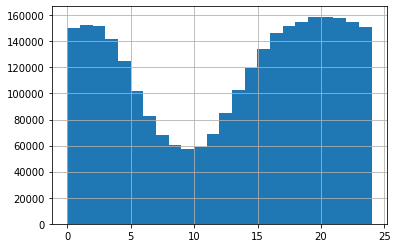

In [15]:
bipolar_data.hourminute.hist(bins=24)

In [16]:
###FUNCTION FOR ANALYZING ONE USER
# one id, time of posting in days (time of the day per user)
idn = bipolar_data[bipolar_data.id == "15786612"]
idn.sample(5)

,id,is_control,full_text,hour,minute,hourminute
created_at,,,,,,
2016-12-05 22:23:53,15786612,0,@Angel_Brynn happy birthday!!!! https://t.co/z...,22,23,22.383333
2018-07-13 02:19:12,15786612,0,@PrincessCardia Of course dear! I can’t wait f...,2,19,2.316667
2016-11-20 02:51:46,15786612,0,Good seats! https://t.co/bBwRxZB4VU,2,51,2.850000
2017-03-01 15:06:49,15786612,0,@FreckledPhoenix a lot of Japanese restaurants...,15,6,15.100000
2018-04-07 00:10:46,15786612,0,@blaberid Cool I’ll leave blue ones then. 👍🏻,0,10,0.166667


In [17]:
idn2016 = idn[(idn.index >= '2016-1-1 01:00:00')]
idn2016.sample(5, random_state=0)

,id,is_control,full_text,hour,minute,hourminute
created_at,,,,,,
2017-10-20 22:37:10,15786612,0,@smileandlead Quality pikas on the two shelves...,22,37,22.616667
2018-06-20 23:54:02,15786612,0,@Ingeborgburger Thank you dear! 💚 I'm sorry yo...,23,54,23.900000
2019-03-01 15:49:38,15786612,0,I'm choosing Scorbunny to join me on my advent...,15,49,15.816667
2016-11-24 14:09:42,15786612,0,🦃🦃🦃🦃🦃🦃🦃 happy turkey day to everyone celebrati...,14,9,14.150000
2018-09-29 23:51:14,15786612,0,@princess_snivy happy birthday! Hope it was aw...,23,51,23.850000


(0, 24)

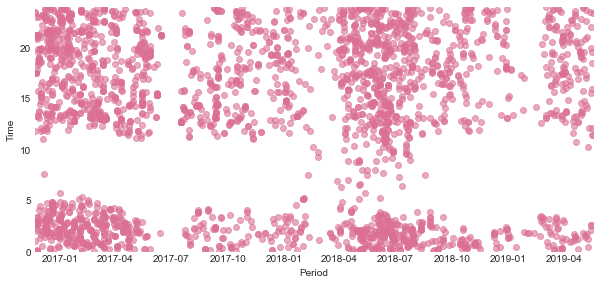

In [18]:
# Use seaborn style defaults and set the default figure size
plt.style.use('seaborn-white')
graph = idn2016['hourminute'].plot(linewidth=1, marker='o', alpha=0.6, linestyle='None', figsize=(10, 5), color = 'palevioletred', legend=False);
sns.set_style("ticks", 
              {"xtick.major.size":3,
               "ytick.major.size":3})
sns.set_context("paper", font_scale=2)
plt.xticks(rotation=0)                                                               
#plt.tight_layout()                                                                    
#plt.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)
plt.ylabel("Time") 
plt.xlabel("Period")
plt.ylim(0,24)

In [21]:
fig = graph.get_figure()
fig.savefig('bipolar_ind.pdf', format='pdf', dpi=200)

In [174]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
